In [3]:
import matplotlib.pyplot as plt;
import numpy as np
import scipy.optimize as opt
plt.rcParams['figure.figsize'] = [15, 10]

In [162]:
rawData = np.genfromtxt('collect_time_40.csv',dtype='float',delimiter=',',unpack=True)
print(rawData)

[[ 14.258572  14.259148  14.259724 ...  54.22228   54.225924  54.22956 ]
 [125.       124.       124.       ... 229.       230.       230.      ]]


In [163]:
print(rawData[0])

[14.258572 14.259148 14.259724 ... 54.22228  54.225924 54.22956 ]


In [164]:
time = rawData[0]
angle = rawData[1]
yUnc = np.full((angle.size),0.5)

(-400.0, 0.0)

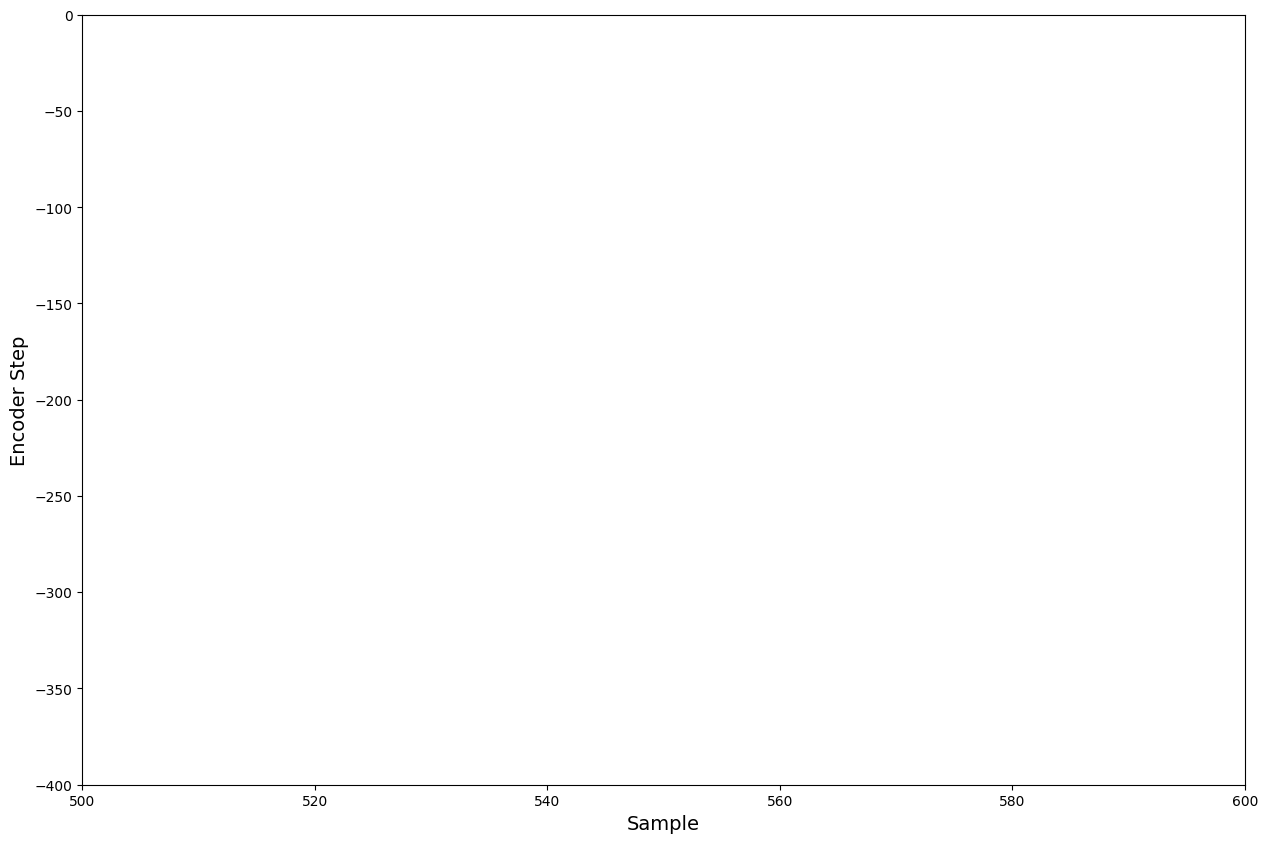

In [165]:
plt.errorbar(time,angle,yerr=yUnc)
plt.xlabel('Sample',fontsize=14)
plt.ylabel('Encoder Step',fontsize=14)
plt.xlim(500,600)
plt.ylim(-400,0)

In [166]:
def pendulumModel(x, *par):
    return par[0]*np.exp(-par[1]*x)* np.sin(par[2]*x+par[3])+par[4]

In [167]:
par0 = [161,1,1,4.05,50]
fitParams,fitCovariance = opt.curve_fit(pendulumModel,time,angle,par0,sigma=yUnc)

/var/folders/hq/_fz6hh5d28d0vdjc51x9tw2w0000gn/T/ipykernel_44235/1266809877.py:2: RuntimeWarning: overflow encountered in exp
  return par[0]*np.exp(-par[1]*x)* np.sin(par[2]*x+par[3])+par[4]


In [168]:
#fitCheck = pendulumModel(time,fitParams[0],fitParams[1],fitParams[2],fitParams[3],fitParams[4])
fitCheck = pendulumModel(time,*fitParams)

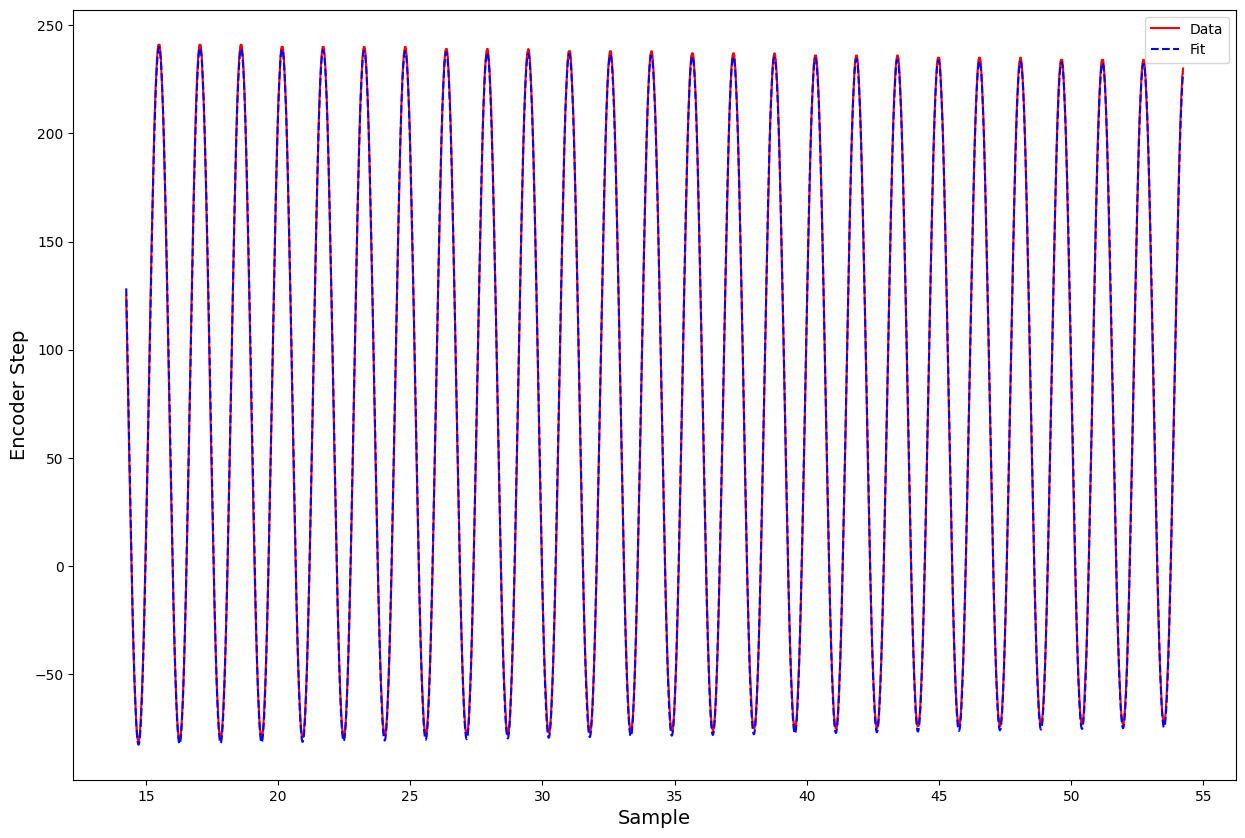

In [169]:
plt.plot(time,angle,'r-',label='Data')
plt.plot(time,fitCheck,'b--',label='Fit')
plt.xlabel('Sample',fontsize=14)
plt.ylabel('Encoder Step',fontsize=14)
plt.legend()

Text(0, 0.5, 'Fit residual')

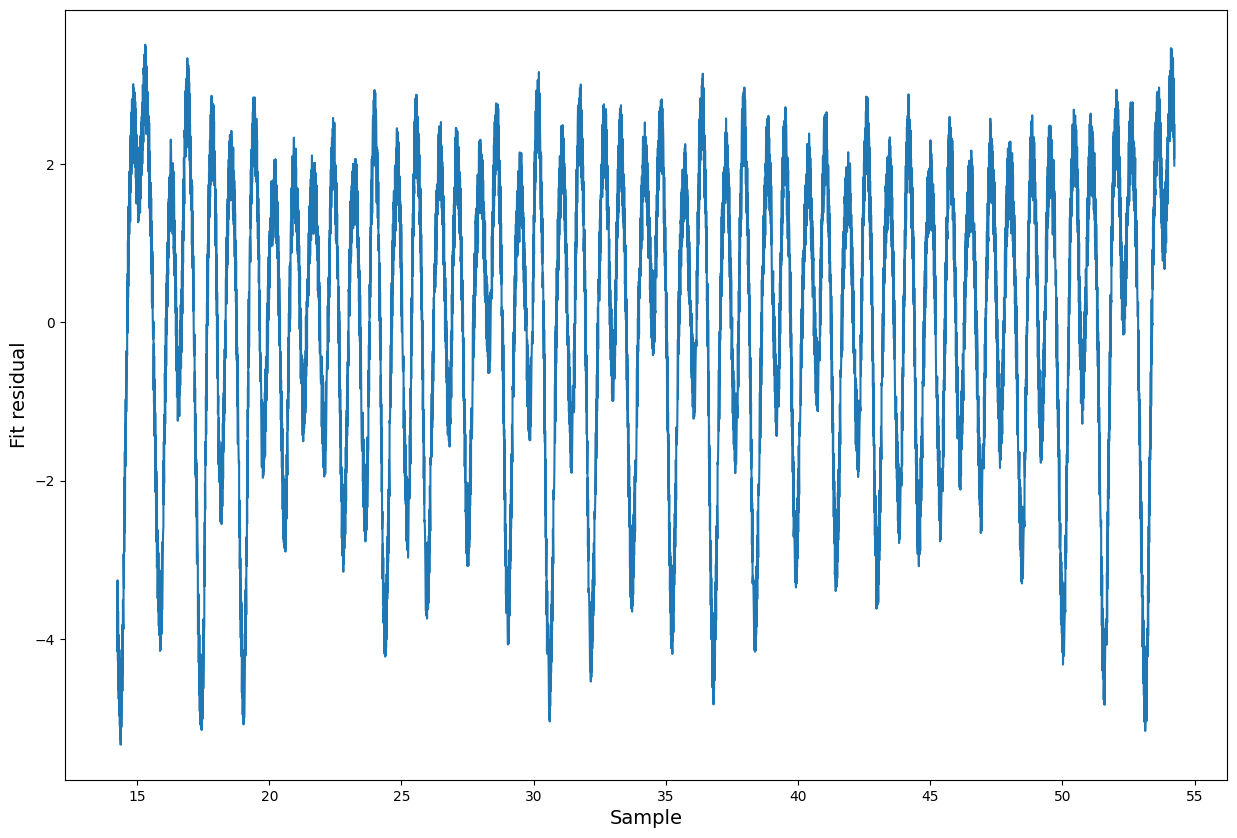

In [170]:
resid = angle-fitCheck
plt.plot(time,resid)
plt.xlabel('Sample',fontsize=14)
plt.ylabel('Fit residual',fontsize=14)

/var/folders/hq/_fz6hh5d28d0vdjc51x9tw2w0000gn/T/ipykernel_44235/3800941536.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.plot(time,resid/angle)


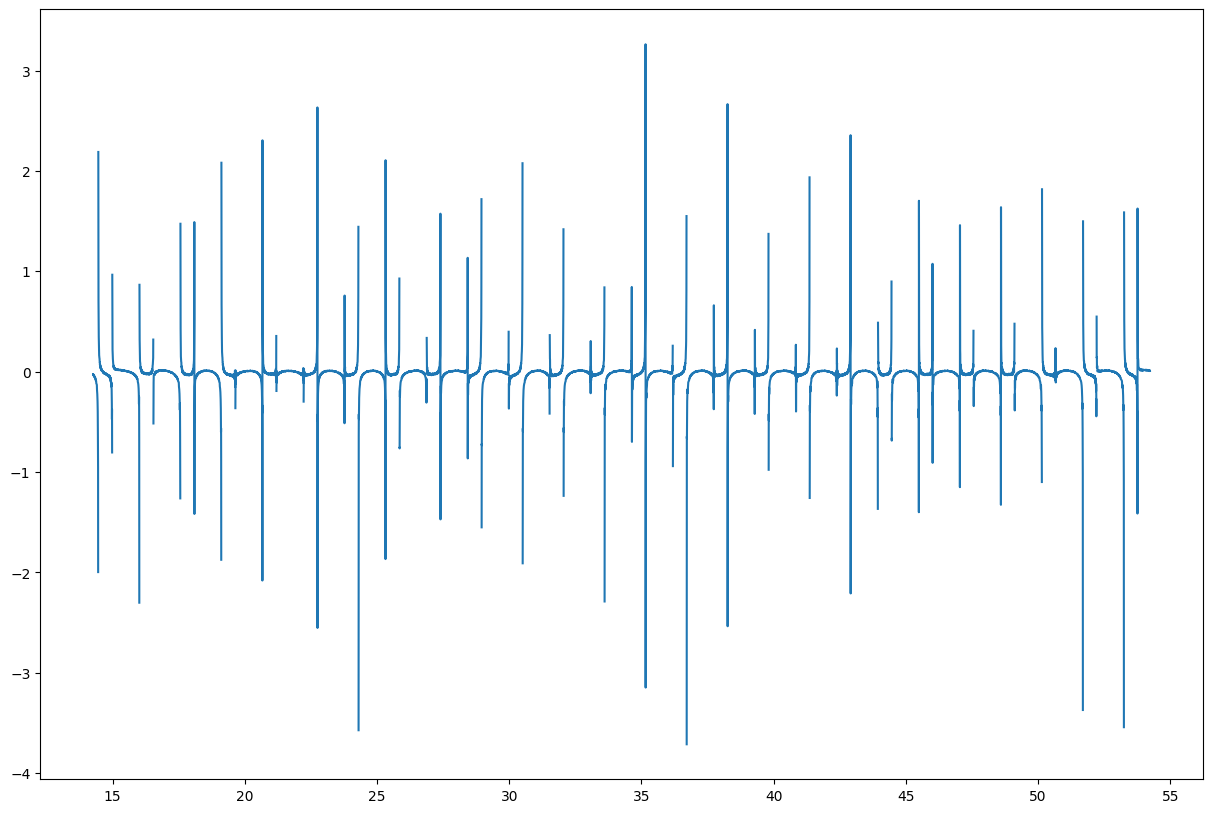

In [171]:
plt.plot(time,resid/angle)

In [172]:
for par in range(fitParams.size):
    print('Parameter',par,':',fitParams[par],'+/-',np.sqrt(fitCovariance[par,par]))

Parameter 0 : 164.4806977106066 +/- 0.08391718455097016
Parameter 1 : 0.0013033254193136029 +/- 1.4247329656758345e-05
Parameter 2 : 4.049856116806897 +/- 1.3878665161393982e-05
Parameter 3 : -42.349623310061 +/- 0.000496769106053166
Parameter 4 : 78.71763945235853 +/- 0.01805928215311456
